<a href="https://colab.research.google.com/github/Uralbeckins/Colab-Works/blob/main/Seminar_2_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Задание для самостоятельной практики

Загрузим наш датасет:

In [1]:
!wget https://raw.githubusercontent.com/HSE-LAMBDA/MLDM-2022/main/01-intro/train.csv

--2025-03-21 19:50:04--  https://raw.githubusercontent.com/HSE-LAMBDA/MLDM-2022/main/01-intro/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>]  58.89K  --.-KB/s    in 0.001s  

2025-03-21 19:50:04 (47.4 MB/s) - ‘train.csv’ saved [60302/60302]



In [2]:
import pandas as pd
import numpy as np
data = pd.read_csv("train.csv", index_col='PassengerId')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.isna().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,687


#### О данных
Вот некоторые из столбцов
* Name - строка с полным именем человека.
* Survived - 1, если человек выжил после кораблекрушения, 0 в противном случае.
* Pclass - класс пассажира. Pclass == 3 - дешевый, Pclass == 1 - для богачей
* Sex - пол человека.
* Age - возраст в годах, если доступен
* SibSp - количество братьев и сестер на корабле
* Parch - количество родителей на корабле
* Fare - стоимость билета
* Embarked - порт, в котором пассажир сошел на берег
* C = Шербур; Q = Куинстаун; S = Саутгемптон


## Task 1

In [4]:
# Compute survival rate for each of the three passenger classes (`Pclass` = 1, 2 and 3)
# (can you do it using groupby?)

# <YOUR CODE>

## Task 2

In [5]:
# Plot the average number of parents onboard (`Parch`) as a function of the
# number of siblings onboard (`SibSp`)

import matplotlib.pyplot as plt



## Task 3

In [91]:
# Build a model with KNeighborsClassifier to get the accuracy of
# at least 0.75 on the validation part of the dataset

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def feature_selection_and_preprocessing(dataset):
  features = dataset[['Fare', 'Parch', 'SibSp', 'Pclass', 'Age']].copy()
  features['Fare'] /= features['Fare'].mean()
  features['Sex'] = dataset.Sex.apply(lambda x: 1 if x == 'male' else 0)
  features.fillna({'Age': np.mean(dataset.Age)}, inplace=True)
  features['Embarked'] = dataset.Embarked.apply(lambda x: ['C', 'S', 'Q'].index(x) if x in ['C', 'S', 'Q'] else 1)
  return features


# feature_selection_and_preprocessing(data).Embarked.values

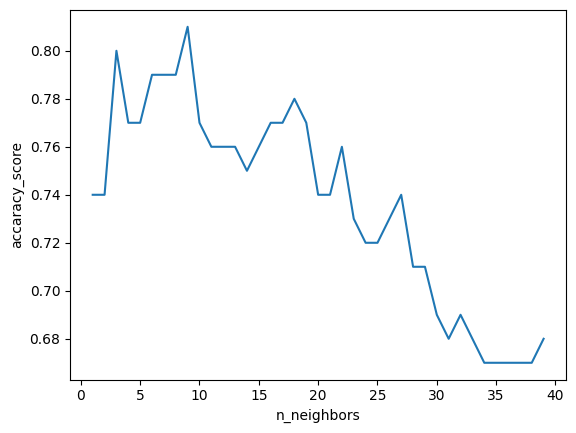

In [104]:
# Validation code (do not touch)
data = pd.read_csv("train.csv", index_col='PassengerId')
data_train = data.iloc[:-100]
data_test = data.iloc[-100:]

neighbors = []
acc = []

for i in range(1, 40):
    model = KNeighborsClassifier(
        # <YOUR CODE>
        # E.g.
        n_neighbors=i
    )

    model.fit(
        feature_selection_and_preprocessing(
            data_train.drop('Survived', axis=1)
        ),
        data_train['Survived']
    )

    test_predictions = model.predict(
        feature_selection_and_preprocessing(
            data_test.drop('Survived', axis=1)
        )
    )

    neighbors.append(i)
    acc.append(accuracy_score(
    data_test['Survived'],
    test_predictions
    ))
fig, ax = plt.subplots()
ax.plot(neighbors, acc)
ax.set_xlabel('n_neighbors')
ax.set_ylabel('accaracy_score')
plt.show()

## Task 4

Проверьте, как работает ваша модель из предыдущего задания со случайными разбиениями на train/test (с тестовым набором размером 100). Постройте гистограмму распределения ошибок при тестировании.
*Hint: check sklearn's `sklearn.model_selection.train_test_split` function.*

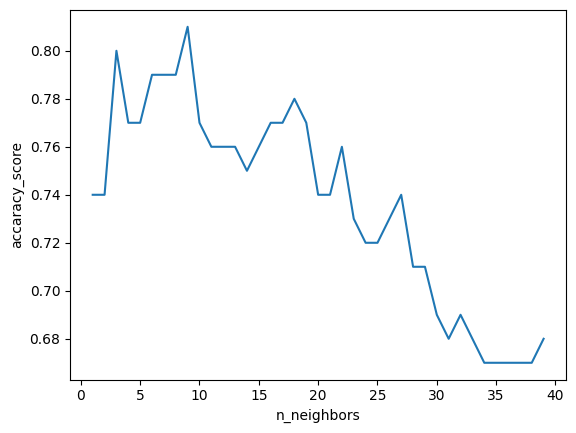

In [105]:
from sklearn.model_selection import train_test_split

data = pd.read_csv("train.csv", index_col='PassengerId')
data_train, data_test =
neighbors = []
acc = []

for i in range(1, 40):
    model = KNeighborsClassifier(
        # <YOUR CODE>
        # E.g.
        n_neighbors=i
    )

    model.fit(
        feature_selection_and_preprocessing(
            data_train.drop('Survived', axis=1)
        ),
        data_train['Survived']
    )

    test_predictions = model.predict(
        feature_selection_and_preprocessing(
            data_test.drop('Survived', axis=1)
        )
    )

    neighbors.append(i)
    acc.append(accuracy_score(
    data_test['Survived'],
    test_predictions
    ))
fig, ax = plt.subplots()
ax.plot(neighbors, acc)
ax.set_xlabel('n_neighbors')
ax.set_ylabel('accaracy_score')
plt.show()
# <YOUR CODE>